In [1]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
target = pd.read_csv('TARGET.csv')
target = target.drop(columns=['Unnamed: 0'])
explicativa = pd.read_csv('EXP.csv', sep=';')

In [3]:
target.head(5)

,VL_MED_FAM
0,0
1,0
2,0
3,0
4,100


In [4]:
explicativa = explicativa.drop(columns=['Unnamed: 0'])
explicativa

,SEXO_RESP_M,UF_Bahia,UF_Ceará,UF_Maranhão,UF_Paraíba,UF_Pernambuco,UF_Piauí,UF_Rio_Grande_do_Norte,UF_Sergipe,MESORREGIAO_MES2,...,ENSINO_Nenhum,ENSINO_PréVestibulareSuperior,RENDAS_S,QTD_COMODO_DOMIC_FAM,QTD_DORM_FAM,QTD_PESSOA,QTD_MASC,RENDA_PROV_TRAB_REG,PERIODO_MAX_TRAB_MEMB,MEDIA_IDADE
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,5.0,2.0,1,1,0,0.0,32
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,4.0,2.0,4,2,0,0.0,27
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,4.0,1.0,1,0,0,0.0,35
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1.0,1.0,2,1,0,0.0,10
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,5.0,3.0,5,3,0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126249,1,1,0,0,0,0,0,0,0,0,...,0,0,0,6.0,3.0,1,1,0,0.0,66
126250,1,1,0,0,0,0,0,0,0,0,...,1,0,0,6.0,3.0,1,1,0,0.0,74
126251,1,1,0,0,0,0,0,0,0,0,...,0,0,0,3.0,2.0,2,1,0,0.0,67
126252,0,1,0,0,0,0,0,0,0,0,...,1,0,0,5.0,2.0,2,1,0,0.0,59


In [5]:
x_treino, x_teste, y_treino, y_teste = train_test_split (explicativa,
                                                         target,
                                                         test_size=0.3,
                                                         random_state=42)

x_treino.shape,x_teste.shape, y_treino.shape, y_teste.shape

((88377, 55), (37877, 55), (88377, 1), (37877, 1))

In [6]:
x_treino.columns

Index(['SEXO_RESP_M', 'UF_Bahia', 'UF_Ceará', 'UF_Maranhão', 'UF_Paraíba',
       'UF_Pernambuco', 'UF_Piauí', 'UF_Rio_Grande_do_Norte', 'UF_Sergipe',
       'MESORREGIAO_MES2', 'MESORREGIAO_MES3', 'MESORREGIAO_MES4',
       'MESORREGIAO_MES5', 'MESORREGIAO_MES6', 'MESORREGIAO_MES7',
       'MESORREGIAO_MES8', 'LOCAL_DOM_FAM_Urbana', 'MAT_PISO_FAMILIA_Cimento',
       'MAT_PISO_FAMILIA_Outro_Material', 'MATERIA_CONSTRUCAO_CAT_A',
       'AGUA_ENCANADA_Sim', 'ABASTECIMENTO_Demais',
       'ABASTECIMENTO_Rede_geral_de_distribuição', 'TEM_BANHEIRO_Sim',
       'ESCOAMENTO_SANITARIO_Fossa_séptica',
       'ESCOAMENTO_SANITARIO_Não_identificado',
       'ESCOAMENTO_SANITARIO_Outro_Meio',
       'ESCOAMENTO_SANITARIO_Rede_coletora_de_esgoto_ou_pluvial',
       'DESTINO_LIXO_É_coletado_diretamente',
       'DESTINO_LIXO_É_coletado_indiretamente',
       'DESTINO_LIXO_É_queimado_ou_enterrado_na_propriedade',
       'CALCAMENTO_Parcial', 'CALCAMENTO_Total', 'CLASSE_CIDADE_Outros',
       'CLASS

### Seleciona variável
##### procurando variáveis interessantes para o modelo 

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE #recursive feature eliminate
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [8]:
best_select = SelectKBest(chi2, k=5)
best_select.fit(explicativa, target)
chi_select = best_select.get_support()

In [9]:
rfe_sel =  RFE(estimator=LinearRegression(fit_intercept=True),
                   step=10,
                   n_features_to_select=5)
rfe_sel.fit(explicativa,target)
log_sel = rfe_sel.get_support()

In [10]:
rfr = SelectFromModel(RandomForestRegressor(random_state=42, n_estimators=100))
rfr_sel = rfr.fit(explicativa, target)
rfr_select = rfr_sel.get_support()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:224: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [11]:
chi_select, log_sel, rfr_select 

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True,  True,
         True]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
         True, False,  True, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, 

In [12]:
col = explicativa.columns
col[chi_select], col[log_sel], col[rfr_select]

(Index(['TM_BF_1', 'RENDAS_S', 'RENDA_PROV_TRAB_REG', 'PERIODO_MAX_TRAB_MEMB',
        'MEDIA_IDADE'],
       dtype='object'),
 Index(['TEM_BANHEIRO_Sim', 'ESCOAMENTO_SANITARIO_Não_identificado', 'TM_BF_1',
        'ENSINO_Nenhum', 'RENDAS_S'],
       dtype='object'),
 Index(['TM_BF_1', 'RENDAS_S', 'QTD_PESSOA', 'RENDA_PROV_TRAB_REG',
        'PERIODO_MAX_TRAB_MEMB', 'MEDIA_IDADE'],
       dtype='object'))

## other 

In [13]:
var_sel = x_treino[['TM_BF_1',
'RENDAS_S',
'RENDA_PROV_TRAB_REG',
'PERIODO_MAX_TRAB_MEMB',
'MEDIA_IDADE',
'ENSINO_Medio',
'ENSINO_NAO_INFORMADO',
'ENSINO_Nenhum',
'ENSINO_PréVestibulareSuperior',
'QTD_PESSOA' ,
'MAT_PISO_FAMILIA_Cimento',
'MAT_PISO_FAMILIA_Outro_Material',]]

In [14]:
# com grid search demora muito, vamos deixar varios codigos testando as opções desejada, assim consigo pegar outras métricas
# para sugerir ao cliente 

In [15]:
libs = {'max_depth':[10,20,30],
        'max_features':["auto", "sqrt","log2"],
        'verbose':[2]       
       } 
rft = RandomForestRegressor(n_estimators = 100, random_state = 42,criterion='mae' ,n_jobs = 2)

In [16]:

grid = GridSearchCV(estimator=rft,
            param_grid=libs,
            cv=10,
            n_jobs = 2)

In [ ]:
result = grid.fit(var_sel,y_treino)

In [ ]:
rft = RandomForestRegressor(n_estimators = 100, random_state = 42,criterion='mae',verbose=2 ,n_jobs = 2,max_depth=10)


In [16]:
ft.score(var_sel, y_treino)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished


0.8202933277718671

In [17]:
pred = ft.predict(var_sel)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished


In [18]:
dados = pd.DataFrame()
dados['pred'] = pred.tolist()
dados['real'] = y_treino.VL_MED_FAM.tolist()
dados['residuo'] = dados.real - dados.pred
dados.head()

,pred,real,residuo
0,0.000,0,0.000
1,952.695,477,-475.695
2,359.210,381,21.790
3,14.110,13,-1.110
4,954.000,954,0.000


In [20]:
var_test = x_teste[['TM_BF_1',
'RENDAS_S',
'RENDA_PROV_TRAB_REG',
'PERIODO_MAX_TRAB_MEMB',
'MEDIA_IDADE',
'ENSINO_Medio',
'ENSINO_NAO_INFORMADO',
'ENSINO_Nenhum',
'ENSINO_PréVestibulareSuperior',
'QTD_PESSOA' ,
'MAT_PISO_FAMILIA_Cimento',
'MAT_PISO_FAMILIA_Outro_Material',]]

In [21]:
predtst = ft.predict(var_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [22]:
dadost = pd.DataFrame()
dadost['pred'] = predtst.tolist()
dadost['real'] = y_teste.VL_MED_FAM.tolist()
dadost['residuo'] = dadost.real - dadost.pred
dadost.head()

,pred,real,residuo
0,46.515,62,15.485
1,0.000,0,0.000
2,827.435,477,-350.435
3,252.645,484,231.355
4,194.605,190,-4.605


### <font color=green> <strong> RANDO FOREST COM PROFUNDIDADE = 5 </strong> </font> 
94.5945072247304

In [97]:
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_array
print(mean_absolute_error(dados.real,dados.pred),mean_absolute_error(dadost.real,dadost.pred))



94.5945072247304 94.32355664387359


In [123]:
print('{} , {}'.format(ft.score(var_sel,y_treino), ft.score(var_test, y_teste)))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s


0.7121509393303388 , 0.7123559080175934


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


# Salvando

In [116]:
import joblib


In [117]:
joblib.dump(ft,
           'random_forest.pkl',
            compress = 1)

['random_forest.pkl']

In [118]:

modelo_salvo = open('random_forest.pkl','rb')
scoring = joblib.load(modelo_salvo)

In [121]:
scoring.predict(var_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


array([ 54.235,  50.44 , 954.   , ..., 318.   ,  54.235, 954.   ])

# residuo 

(array([4.8500e+02, 3.7000e+01, 1.6140e+03, 3.0730e+03, 8.0090e+03,
        6.5668e+04, 3.4160e+03, 2.6700e+03, 1.9050e+03, 4.9400e+02,
        6.7500e+02, 1.2400e+02, 5.7000e+01, 6.6000e+01, 4.1000e+01,
        2.6000e+01, 6.0000e+00, 6.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([-954.     , -773.04275, -592.0855 , -411.12825, -230.171  ,
         -49.21375,  131.7435 ,  312.70075,  493.658  ,  674.61525,
         855.5725 , 1036.52975, 1217.487  , 1398.44425, 1579.4015 ,
        1760.35875, 1941.316  , 2122.27325, 2303.2305 , 2484.18775,
        2665.145  ]),
 <a list of 20 Patch objects>)

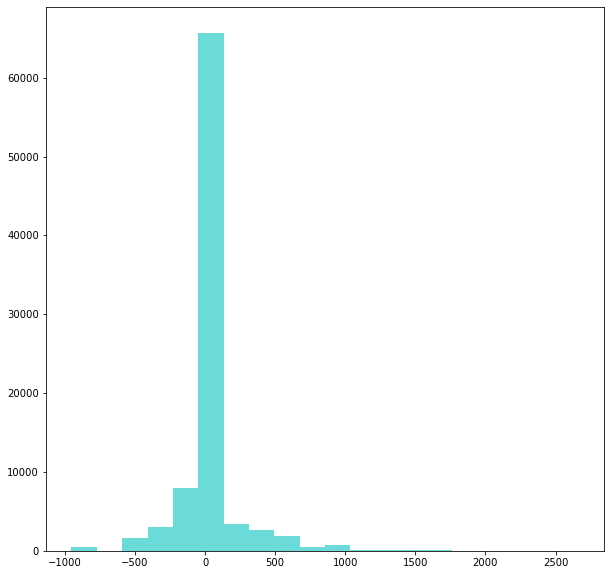

In [130]:
import matplotlib.pyplot as plt 
plt.subplots(1,1,figsize=(10,10))
plt.hist(dados.residuo, color='#6ADBD9', bins=20)
